In [3]:
import numpy as np
import math
from math import exp
from IPython.display import display
from sympy import *
init_printing()
import matplotlib.pyplot as plt
%matplotlib notebook

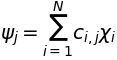

In [4]:
chi = IndexedBase('chi')  # Atomic orbital
c = IndexedBase('c')    # MO coefficients
psi = IndexedBase('psi')  # Molecular orbital
i = Symbol('i', integer=True)   # index of atomic orbitals
j = Symbol('j', integer=True)   # index of molecular orbital
N = Symbol('N', integer=True)   # Number of atomic orbitals

mo_expr = Sum(c[i,j] * chi[i], (i,1,N))
Eq(psi[j], mo_expr)

## Molecular Orbitals
The GaussianOrbitals notebook went into detail about the individual basis functions on each atomic site.  These orbitals get combined to for molecular orbitals - a linear combination of orbitals from both the same atom and different atoms.

The code to evaluate basis functions has been placed in 'gaussian_orbitals.py', and the code to read the basis and MO information from the QMCPACK XML input file is in 'read_qmcpack.py'

In [5]:
# Contains 
# - CG_basis (named tuple) for storing basis contraction coefficients
# - GTO class - symbolic form for basis functions (and derivatives) and methods for evaluating them
# - GTO_centers - multiple atoms of different kinds at different locations

import gaussian_orbitals
reload(gaussian_orbitals)
from gaussian_orbitals import GTO, CG_basis, GTO_centers

from read_qmcpack import parse_qmc_wf, read_structure_file

In [7]:
# For Neon with DEF2-SVP
ne_basis_set, ne_MO_matrix = parse_qmc_wf('ne_def2_svp.wfnoj.xml',['Ne'])
for cg in ne_basis_set:
    print cg
    
ne_MO_matrix

MO coeff size =  14
Ne


array([[ 0.990133, -0.031233,  0.009072,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ],
       [ 0.322026,  0.643777,  0.460567, -0.      , -0.      , -0.      ,
        -0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
        -0.      , -0.      , -0.      ],
       [-0.      , -0.      , -0.      ,  0.697249, -0.      , -0.      ,
        -0.454527, -0.      , -0.      , -0.      , -0.      , -0.      ,
        -0.      , -0.      , -0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.697249,
         0.      ,  0.      , -0.454527,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ],
       [-0.      , -0.      , -0.      , -0.      ,  0.697249, -0.      ,
        -0.      , -0.454527, -0.      , -0.      , -0.      , -0.      ,
        -0.      , -0.      , -0.      ],
       [ 0.327583,  1.608118, -1.575531,  0.      

In [8]:
ne_gto = GTO(ne_basis_set['Ne'])
ne_one_eval = ne_gto.eval_v(0.2, 0.3, 0.1)
print ne_one_eval

[-0.46242075697109086, 0.7402974041672985, 0.35013343898398275, -0.746944254700568, -1.120416382050852, -0.373472127350284, 0.09424566278803664, 0.14136849418205494, 0.04712283139401832, 0.15370224555863643, 0.3458300525069319, 0.03842556138965911, 0.39933014781747894, 0.13311004927249298, 0.19966507390873944]


In [9]:
%%time
rvals = np.arange(-4.0, 4.0, .1)
ne_atomic_orbs = np.zeros( (len(ne_one_eval), rvals.shape[0]))
print ne_atomic_orbs.shape
for i,x in enumerate(rvals):
    ne_atomic_orbs[:,i] = ne_gto.eval_v(x, 0.0, 0.0)

(15, 80)
CPU times: user 50.2 ms, sys: 4.53 ms, total: 54.7 ms
Wall time: 37.8 ms


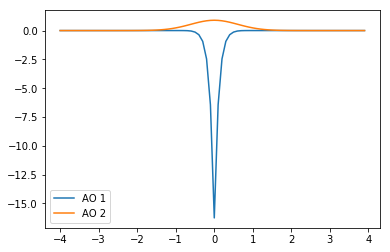

In [10]:
plt.plot(rvals, ne_atomic_orbs[0,:], label="AO 1")
plt.plot(rvals, ne_atomic_orbs[1,:], label="AO 2")
plt.legend()

In [11]:
%%time
n = 50
xsp = np.linspace(-1, 1, n)
xyzvals = np.meshgrid(xsp, xsp, xsp)
xyzvals = np.zeros( (n,n,n))
for i,x in enumerate(xsp):
    for j,y in enumerate(xsp):
        for k,z in enumerate(xsp):
            xyzvals[i,j,k] = ne_gto.eval_v(x,y,z)[1]

CPU times: user 39.5 s, sys: 185 ms, total: 39.6 s
Wall time: 39.2 s


In [12]:
print xyzvals

[[[0.01537756 0.01713686 0.01901144 ... 0.01901144 0.01713686 0.01537756]
  [0.01713686 0.01909744 0.02118648 ... 0.02118648 0.01909744 0.01713686]
  [0.01901144 0.02118648 0.02350404 ... 0.02350404 0.02118648 0.01901144]
  ...
  [0.01901144 0.02118648 0.02350404 ... 0.02350404 0.02118648 0.01901144]
  [0.01713686 0.01909744 0.02118648 ... 0.02118648 0.01909744 0.01713686]
  [0.01537756 0.01713686 0.01901144 ... 0.01901144 0.01713686 0.01537756]]

 [[0.01713686 0.01909744 0.02118648 ... 0.02118648 0.01909744 0.01713686]
  [0.01909744 0.02128232 0.02361036 ... 0.02361036 0.02128232 0.01909744]
  [0.02118648 0.02361036 0.02619307 ... 0.02619307 0.02361036 0.02118648]
  ...
  [0.02118648 0.02361036 0.02619307 ... 0.02619307 0.02361036 0.02118648]
  [0.01909744 0.02128232 0.02361036 ... 0.02361036 0.02128232 0.01909744]
  [0.01713686 0.01909744 0.02118648 ... 0.02118648 0.01909744 0.01713686]]

 [[0.01901144 0.02118648 0.02350404 ... 0.02350404 0.02118648 0.01901144]
  [0.02118648 0.023610

In [23]:
# Use ipyvolume to render in 3D
import ipyvolume as ipy

In [24]:
ipy.quickvolshow(xyzvals,level=[0.1,0.2,0.9])

VkJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oTGFiZWwodmFsdWU9dSdsZXZlbHM6JyksIEZsb2F0U2xpZGVyKHZhbHVlPTAuMSwgbWF4PTEuMCwgc3RlcD0wLjDigKY=


In [15]:
ne_mo = np.dot(ne_MO_matrix, ne_atomic_orbs)

In [16]:
ne_mo.shape

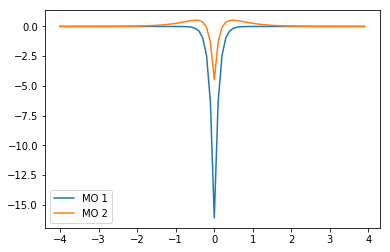

In [17]:
plt.plot(rvals, ne_mo[0,:], label="MO 1")
plt.plot(rvals, ne_mo[1,:], label="MO 2")
plt.legend()

In [18]:
# For HCN
hcn_pos_list, hcn_elements = read_structure_file("hcn.structure.xml")
hcn_basis_sets, hcn_MO_matrix = parse_qmc_wf("hcn.wfnoj.xml", hcn_elements)

hcn_gtos = GTO_centers(hcn_pos_list, hcn_elements, hcn_basis_sets)
print hcn_pos_list

MO coeff size =  33
[[-1.09604107  0.          0.        ]
 [ 1.09604107  0.          0.        ]
 [ 3.10859925  0.          0.        ]]


In [19]:

rvals = np.arange(-5.0, 5.0, .2)

hcn_one_eval = hcn_gtos.eval_v(0.2, 0.3, 0.1)

hcn_atomic_orbs = np.zeros( (len(hcn_one_eval), rvals.shape[0]))
print hcn_atomic_orbs.shape
for i,x in enumerate(rvals):
    hcn_atomic_orbs[:,i] = hcn_gtos.eval_v(x, 0.0, 0.0)

(35, 50)


In [20]:
hcn_mo = np.dot(hcn_MO_matrix, hcn_atomic_orbs)

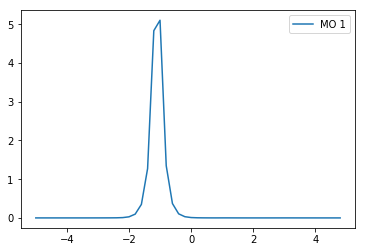

In [21]:
fig1,ax1 = plt.subplots()
#ax1.plot(rvals, hcn_atomic_orbs[0,:], label="AO 1")
#ax1.plot(rvals, hcn_atomic_orbs[1,:], label="AO 2")
ax1.plot(rvals, hcn_mo[0,:], label="MO 1")
plt.legend()
